In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# ScatterPlot
+ Biểu diễn mối quan hệ giữa 2 Variable. 
+ Cũng có thể biểu diễn lên đến 3 chiều dữ liệu nếu sử dụng biến hue
+ các tham số được kế thừa từ thằng matplotlib: [Link](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter)
+ Sử dụng relplot() nếu muốn chia biểu đồ ban đầu thành các biểu đồ con dựa vào 1 biến. Chữ rel là viết tắt của từ relationship
+ trong hàm <u>scatterplot() không có tham số để vẽ trending line</u>. Muốn vẽ phải dùng lmplot(). chữ lm là viết tắt của từ linear model

### Simple ScatterPlot

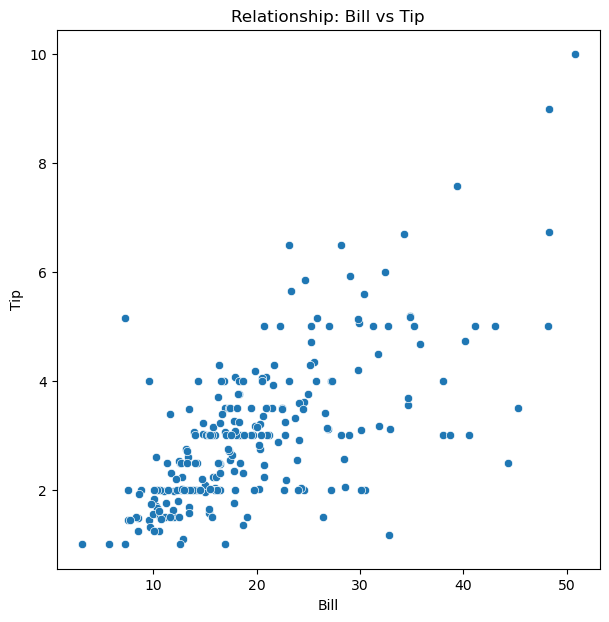

In [3]:
fig,ax = plt.subplots(figsize= (7,7))
sns.scatterplot(data=tips, x='total_bill', y='tip')

ax.set_title('Relationship: Bill vs Tip')
ax.set_xlabel('Bill')
ax.set_ylabel('Tip')
plt.show()

### Tham số hue,palette để đổ màu cho từng điểm dữ liệu
+ Nếu hue là Categorical Variable thì chuyền vào biến palette là 1 bảng màu palette: [link](https://www.practicalpythonfordatascience.com/ap_seaborn_palette#set1-set1-r)
+ Nếu hue là Numberical Variable thì chuyền vào biến palette là 1 colormap: [link](https://matplotlib.org/stable/users/explain/colors/colormaps.html). Legend sẽ hiển thị 1 vài giá trị tiêu biểu cách đều nhau. Như hình bên dưới, Legend hiển thi như vậy không có nghĩa giá trị lớn nhất là 9.0 và nhỏ nhất là 1.5. Còn nếu muốn sử dụng với toàn bộ giá trị dữ liệu hiên thị trên Legend thì *<u>set tham số legend='full'</u>*

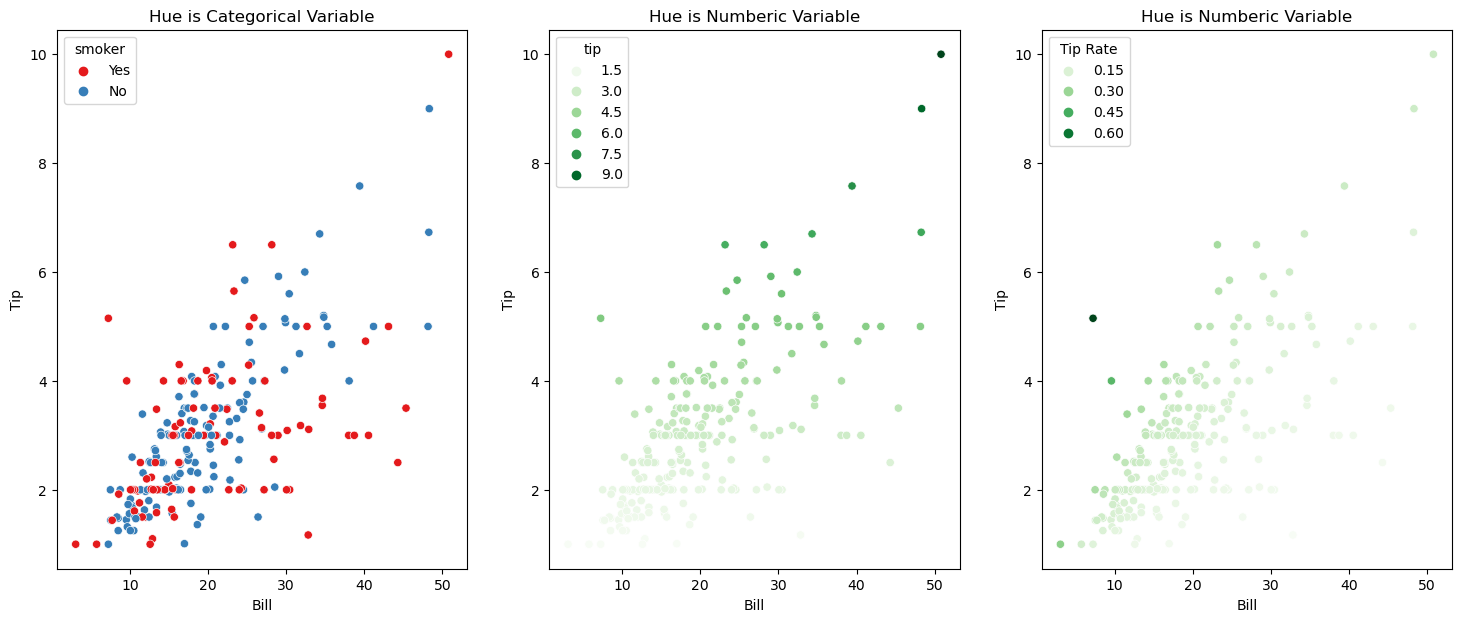

In [4]:
fig,ax = plt.subplots(1,3, figsize=(18,7))

sns.scatterplot(data=tips, x='total_bill', y='tip', hue='smoker', palette='Set1', ax=ax[0]) # smoker is Categorical Variable. Use Color Palette
ax[0].set_title('Hue is Categorical Variable')
ax[0].set_xlabel('Bill')
ax[0].set_ylabel('Tip')

sns.scatterplot(data=tips, x='total_bill', y='tip', hue='tip', palette='Greens', ax=ax[1])  # tip is Numberic Variable. Use Colormap
ax[1].set_title('Hue is Numberic Variable')
ax[1].set_xlabel('Bill')
ax[1].set_ylabel('Tip')

# bien doi 1 chut. Có thể hiển thị dũ liệu nào tùy ý mình điều chỉnh
tip_rate = tips['tip'] / tips['total_bill']
tips['tip_rate'] = tip_rate
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='tip_rate', palette='Greens', ax=ax[2])   # tỉ lệ tiền tip
ax[2].set_title('Hue is Numberic Variable')
ax[2].set_xlabel('Bill')
ax[2].set_ylabel('Tip')
ax[2].legend(title='Tip Rate')   # đổi tên legend

plt.show()

### Tham số style để  thay đổi marker cho từng biến được nhóm bởi biến hue
+ Thường style và hue cùng chung 1 giá trị và là <u>Categorical Variable </u>   
+ Tham số này hay dùng để nhấn mạnh thêm cho biến hue
+ Dùng kèm với tham số <u>markers</u> để xác định sử dụng marker gì

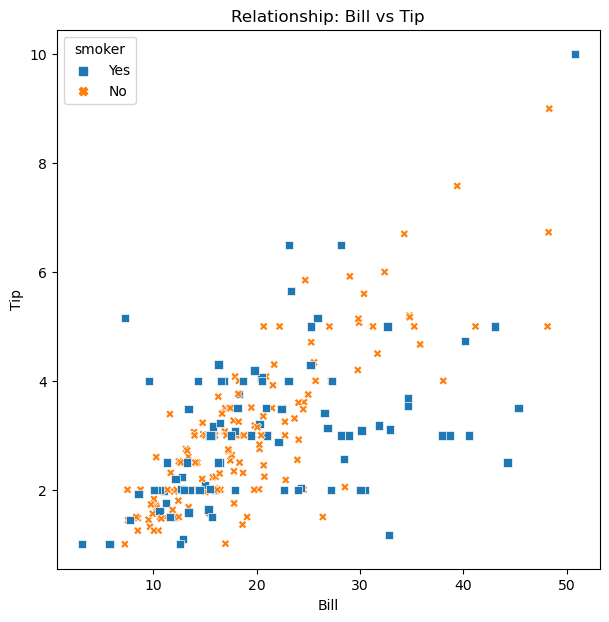

In [5]:
fig,ax = plt.subplots(figsize=(7,7))

sns.scatterplot(data=tips, x='total_bill', y='tip', hue='smoker', style='smoker', markers={'Yes':'s', 'No':'X'})   # hue == style; s là square
                                         
ax.set_title('Relationship: Bill vs Tip')
ax.set_xlabel('Bill')
ax.set_ylabel('Tip')
plt.show()

### Tham số Size để điều chỉnh kích thước điểm dữ liệu được hiển thị
Sử dụng kèm tham số sizes để xác định khoảng kích thước sẽ được vẽ lên, như trên ví dụ dưới, giá trị nhỏ nhất sẽ được vẽ với chấm tròn có kích thước là 20, giá trị lớn nhất sẽ được vẽ với chấm tròn có kích thước là 200

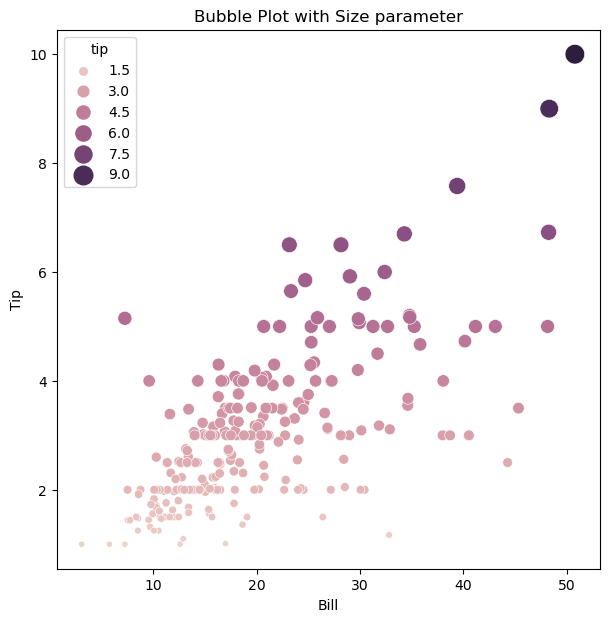

In [4]:
fig,ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='tip', size='tip', sizes=(20,200))

ax.set_title('Bubble Plot with Size parameter')
ax.set_xlabel('Bill')
ax.set_ylabel('Tip')
plt.show()

### Hue vs Style vs Size
+ 3 tham số để chia nhỏ đồ thị ban đầu thành các đồ thị con. Điều đó có nghĩa với 3 tham số <u>***(hue, style, size) + (x,y)*** thì Scatterplot có thể biểu diễn tới 5 thuộc tính</u> trên cùng 1 plot. Tuy nhiên ko ai làm thế vì sẽ rất rối mắt. Thông thường sẽ chỉ biểu diễn 3 thuộc tính trên cùng 1 Scatterplot, 3 biến (hue, style, size) thưong đc set giống nhau


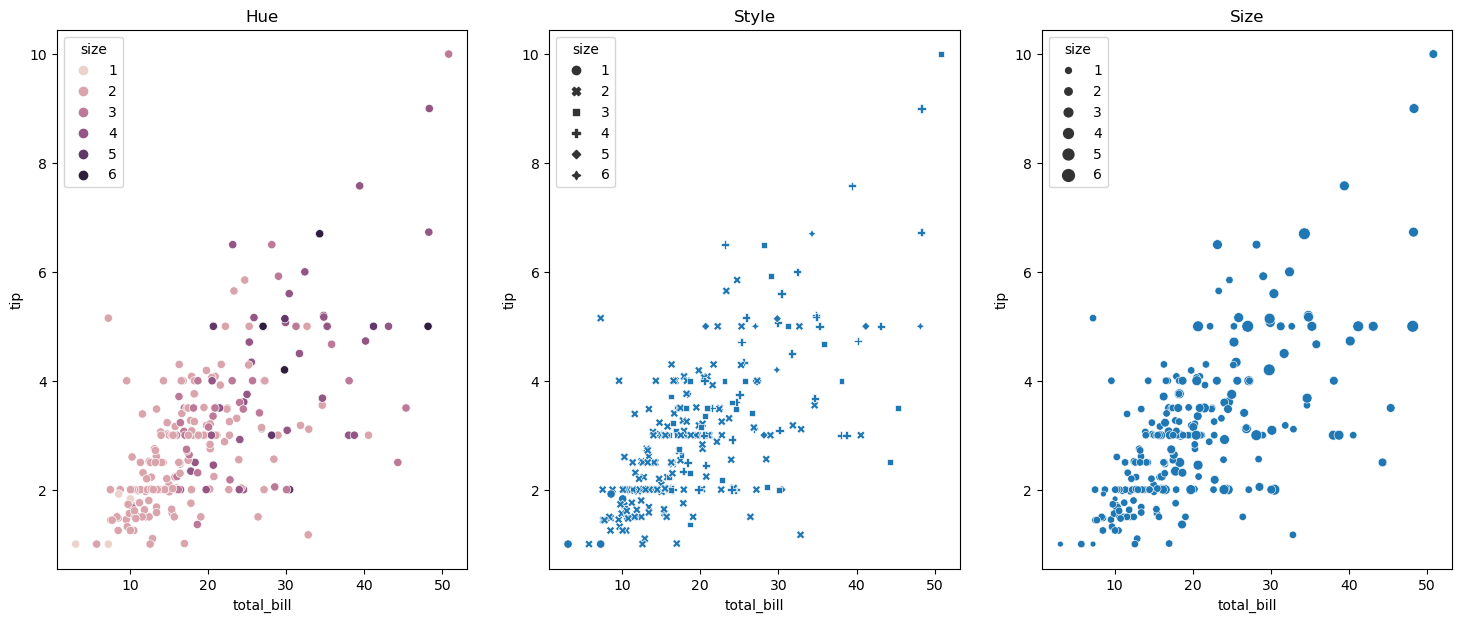

In [6]:
fig,ax = plt.subplots(1,3, figsize=(18,7))

sns.scatterplot(data=tips, x='total_bill', y='tip', hue='size', ax=ax[0])    # hue
sns.scatterplot(data=tips, x='total_bill', y='tip', style='size', ax=ax[1])  # style
sns.scatterplot(data=tips, x='total_bill', y='tip', size='size', ax=ax[2])   # size

ax[0].set_title('Hue')
ax[1].set_title('Style')
ax[2].set_title('Size')
plt.show()

### Wide Form với ScatterPlot
Với dữ liệu dạng Wide, các x=(index của hàng), y=(giá trị mỗi ô), hue=(tên các cột)

In [20]:
index = pd.date_range("1 1 2000", periods=100, freq="ME", name="date")
data = np.random.randn(100, 4).cumsum(axis=0)   # ko can quan tam thang cumsum nay 
wide_df = pd.DataFrame(data, index, ["a", "b", "c", "d"])  # tạo dữ liệu dạng wide-form
print('Kieu du lieu Index: ',type(index))
wide_df

Kieu du lieu Index:  <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


,a,b,c,d
date,,,,
2000-01-31,0.973055,0.870094,-0.282251,-0.223749
2000-02-29,0.451587,-0.040489,-1.562386,2.234515
2000-03-31,0.098494,-0.156810,-1.531550,0.974971
2000-04-30,-0.925233,0.761670,-2.047539,0.515031
2000-05-31,-0.071284,0.690090,-0.936460,-0.385370
...,...,...,...,...
2007-12-31,1.596325,2.230428,-15.126172,-9.794202
2008-01-31,-0.052280,2.240501,-15.227888,-9.061032
2008-02-29,1.239342,1.267055,-15.144336,-10.405713


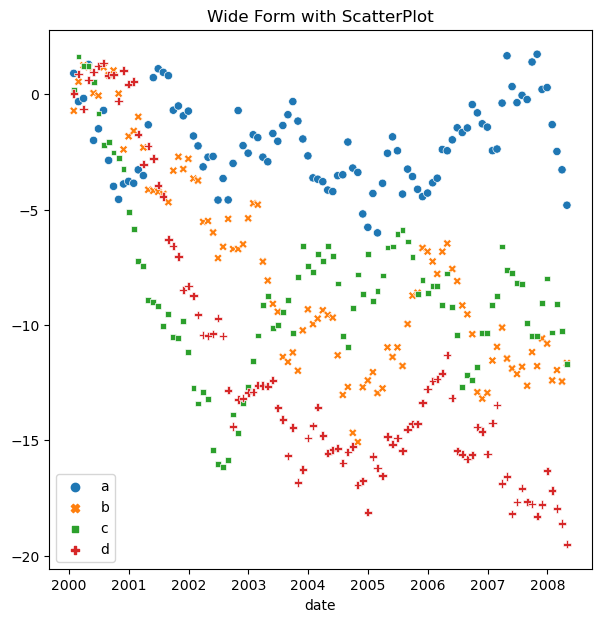

In [17]:
fig,ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=wide_df)

ax.set_title('Wide Form with ScatterPlot')
plt.show()

### hue_order, style_order, size_order
+ hue_order: giống với thằng hue_order của boxplot
+ size_order: chỉ dùng khi biến size không phải là biến số, ví dụ như size là số thứ tự, (cao, thấp)... size_order=['cao', 'thap']. tức là thằng nào có giá trị size='cao' thì thằng đó sẽ được biểu diễn nhỏ hơn
+ style_order: sẽ không cần dùng thằng này

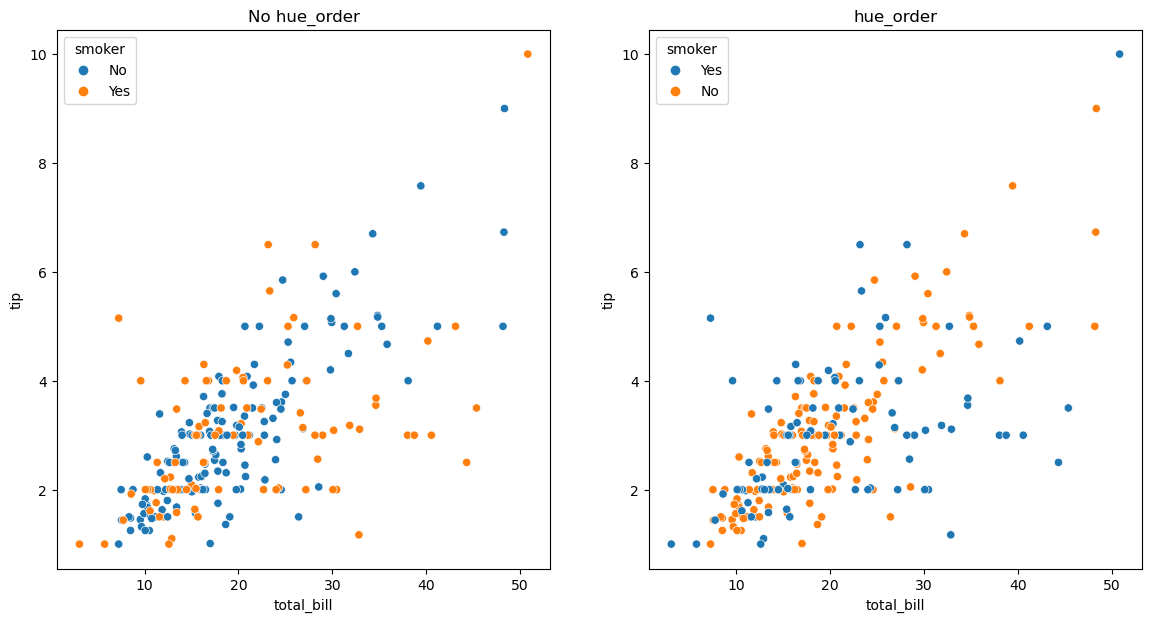

Nhan xet:
+ mau sac duoc doi cho cho nhau
Original Order of smoker(hue): [No, Yes]
----------------------------------------




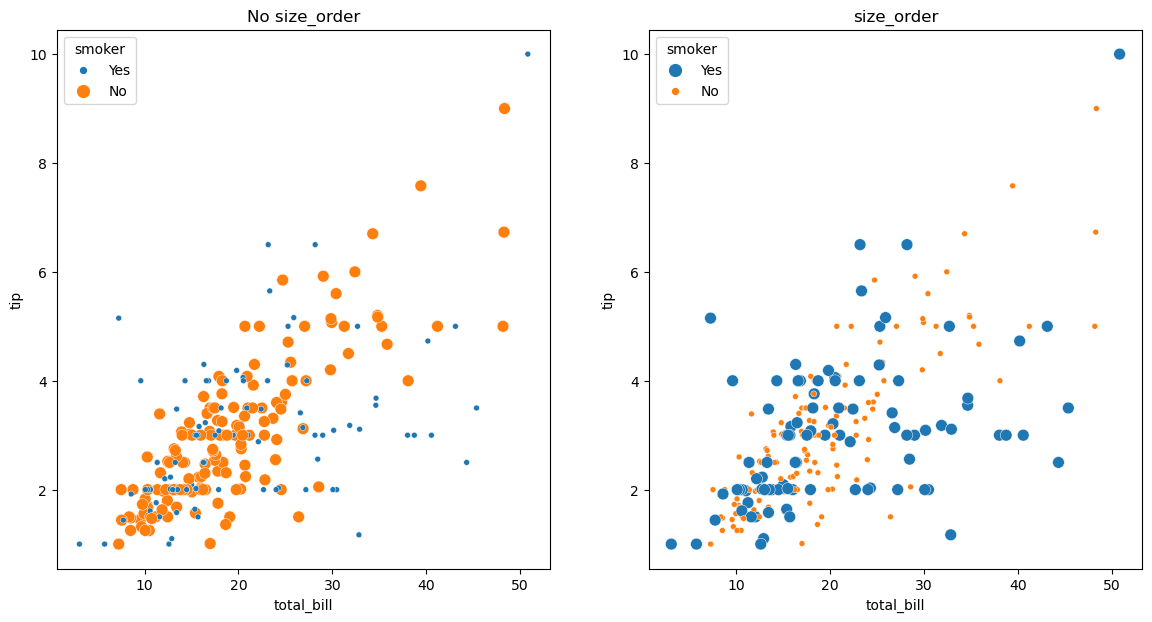

Nhan xet:
+ Bien nao xep truoc trong size_order sẽ được hiển thị nhỏ hơn
----------------------------------------




In [49]:
fig,ax = plt.subplots(1,2, figsize=(14,7))

sns.scatterplot(data=tips, x='total_bill', y='tip', hue='smoker', ax=ax[1])  
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='smoker', hue_order=['No','Yes'],  ax=ax[0])   # hue_order
ax[0].set_title('No hue_order')
ax[1].set_title('hue_order')
plt.show()
print('Nhan xet:\n+ mau sac duoc doi cho cho nhau')
print('Original Order of smoker(hue): [No, Yes]')
print('----------------------------------------\n\n')

fig,ax = plt.subplots(1,2, figsize=(14,7))
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='smoker', size='smoker', ax=ax[1])  
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='smoker', size='smoker', size_order=['No','Yes'],  ax=ax[0])   # size_order
ax[0].set_title('No size_order')
ax[1].set_title('size_order')
plt.show()
print('Nhan xet:\n+ Bien nao xep truoc trong size_order sẽ được hiển thị nhỏ hơn')
print('----------------------------------------\n\n')


### Chia biểu đồ thành nhiều biểu đồ con
+ Sử dụng <u>relplot</u> để  chia biểu đồ thành các biểu đồ con
+ sử dung tham số <u>col</u> để xác định xem biến nào sẽ được sử dụng để chia. Như vd bên dưới, sử dụng biến 'day' để chia thành 2 bảng với mỗi bảng là các điểm có chung giá trị biến 'day'
+ Có vẻ như không thể chỉnh kích thước của relplot:
    + col: chia fig thành các cột theo biến col. Mỗi plot ở cột sẽ có giá biến col giống nhau. 
    + row: chia fig thành các hàng theo biến row. Mỗi plot ở hàng sẽ có giá trị biến row giống nhau.                 

+ VD bên duói: 
    + sử dụng biến col=day để chia thành fig thành 4 phần theo chiều dọc, mỗi phần vẽ các Plot có giá trị biến day giống nhau
    + sử dụng biến row=smoker để chia fig thành 2 phần theo chiều ngang, mỗi phần vẽ các Plot có giá tri biến smoker giống nhau


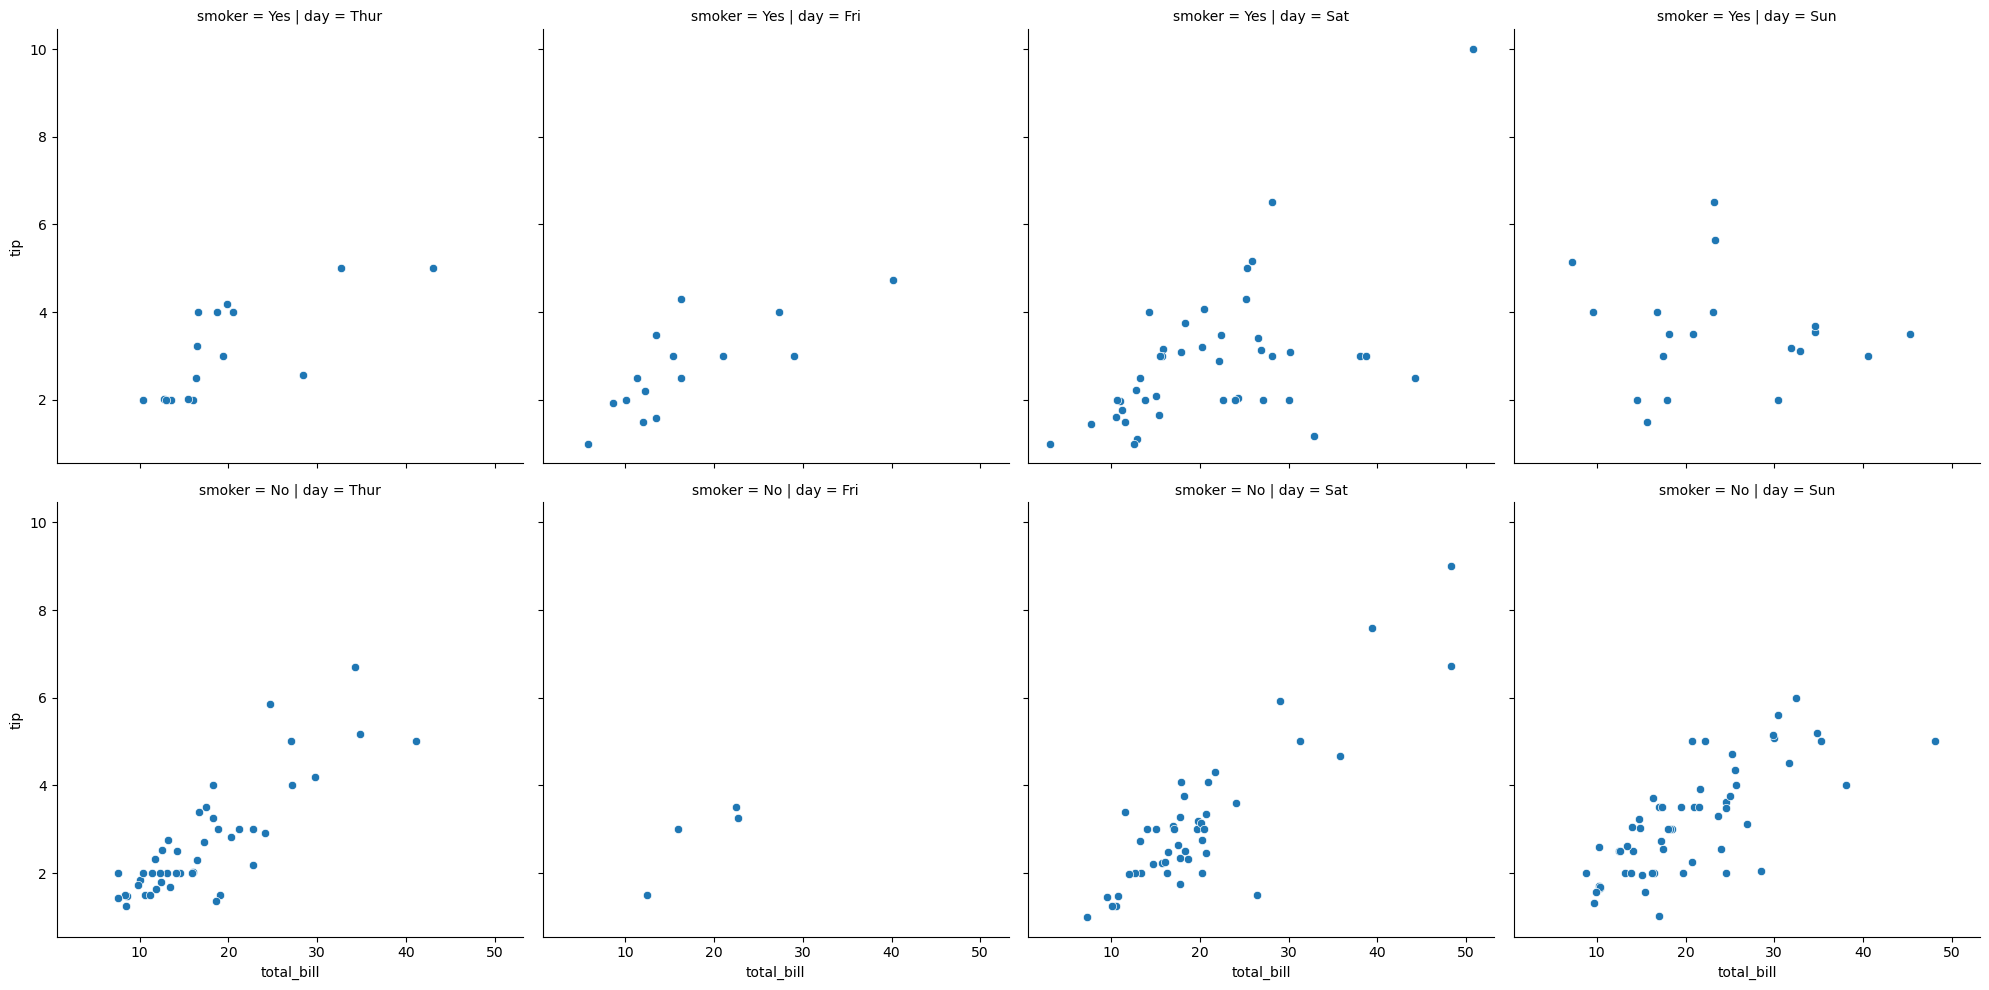

Nhận xét: Mỗi plot biểu diễn các đối tượng có thuộc tính day giống nhau


In [61]:
sns.relplot(kind='scatter', data=tips, x='total_bill', y='tip', col='day', row='smoker')   # col, row
plt.show()
print('Nhận xét: Mỗi plot biểu diễn các đối tượng có thuộc tính day giống nhau')

In [55]:
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

### Vẽ Trending line sử dụng lmplot()

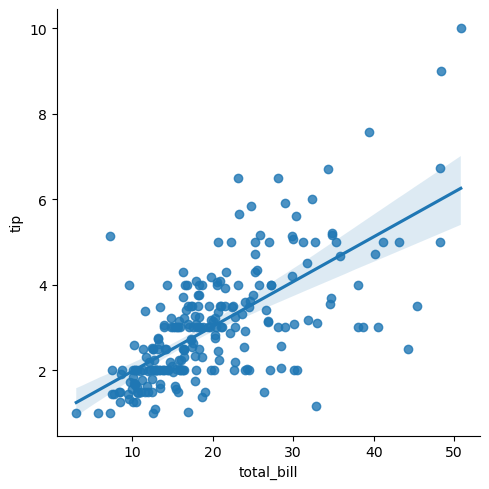

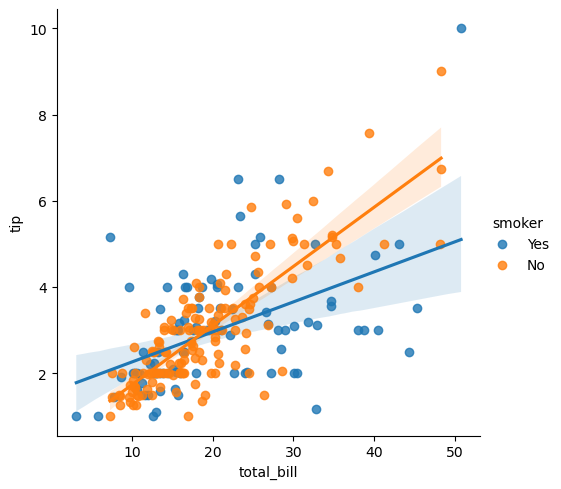

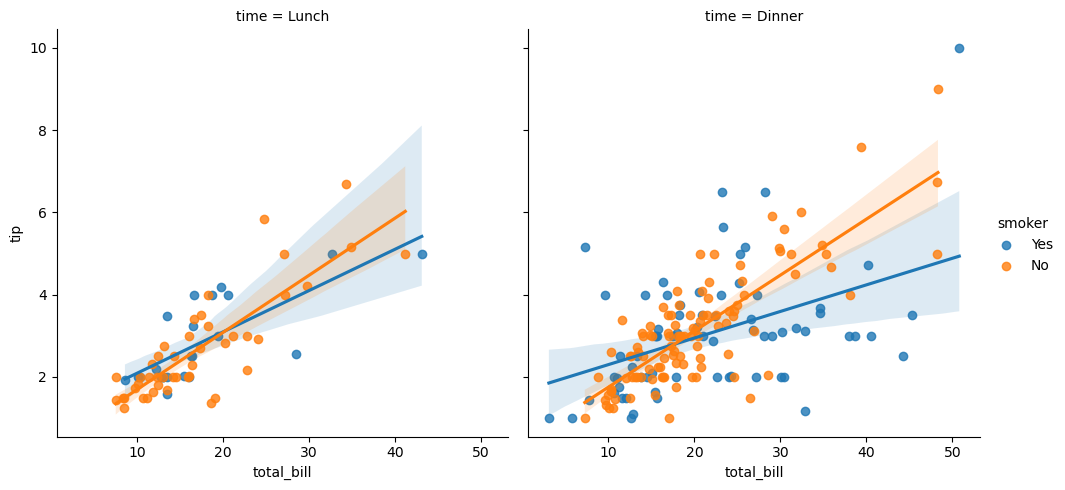

In [17]:
sns.lmplot(data=tips, x='total_bill', y='tip')
sns.lmplot(data=tips, x='total_bill', y='tip', hue='smoker')              # hue 
sns.lmplot(data=tips, x='total_bill', y='tip', hue='smoker', col='time')  # hue & col
plt.show()
